In [ ]:
!pip install numpy
!pip install matplotlib

# ***Introduction***




**OpenMP(Open Multi Processing) is An Application Program Interface (API) that may be used to explicitly direct multi-threaded, shared memory parallelism**

Goals of OpenMP:


1.   Standardization:
Provide a standard among a variety of shared memory architectures/platforms
Jointly defined and endorsed by a group of major computer hardware and software vendors
2.   Lean and Mean:
Establish a simple and limited set of directives for programming shared memory machines.
Significant parallelism can be implemented by using just 3 or 4 directives.
This goal is becoming less meaningful with each new release, apparently.
3.   Ease of Use:
Provide capability to incrementally parallelize a serial program, unlike message-passing libraries which typically require an all or nothing approach
Provide the capability to implement both coarse-grain and fine-grain parallelism
4.   Portability:
The API is specified for C/C++ and Fortran
Public forum for API and membership
Most major platforms have been implemented including Unix/Linux platforms and Windows

![](https://encyclopedia.pub/media/common/202210/mceclip1-634f75683a964.png)









# ***OpenMP Programming Model***



*   Memory Model : OpenMP is designed for multi-processor/core, shared memory machines.
![Image Description](https://hpc-tutorials.llnl.gov/openmp/images/uma.gif)


*   Execution Model :


1.   Thread Based Parallelism:
OpenMP programs accomplish parallelism exclusively through the use of threads. A thread of execution is the smallest unit of processing that can be scheduled by an operating system.
2.   Fork - Join Model:
OpenMP uses the fork-join model of parallel execution:
![](https://hpc-tutorials.llnl.gov/openmp/images/fork_join.gif)

FORK: the master thread then creates a team of parallel threads.

JOIN: When the team threads complete the statements in the parallel region construct, they synchronize and terminate, leaving only the master thread.







# ***First Program : Hello World***

In [ ]:
%%writefile hello_openmp.c
#include <omp.h>
#include <stdio.h>

int main() {
    // Set the number of threads explicitly to 8
    omp_set_num_threads(8);

    // Start parallel region
    #pragma omp parallel
    {
        // Get thread ID
        int tid = omp_get_thread_num();

        // Print "Hello, World!" from each thread
        printf("Hello, World! from thread %d\n", tid);
    } // End parallel region

    return 0;
}


Writing hello_openmp.c


In [ ]:
!gcc -fopenmp hello_openmp.c
!./a.out


Hello, World! from thread 2
Hello, World! from thread 1
Hello, World! from thread 3
Hello, World! from thread 0
Hello, World! from thread 7
Hello, World! from thread 4
Hello, World! from thread 5
Hello, World! from thread 6


Calculation of pi using Monte-Carlo Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Initialize x and y globally
x = np.random.rand(10000)
y = np.random.rand(10000)

# Function to estimate π using Monte Carlo method
def monte_carlo_pi(num_samples):
    global x, y
    inside_circle = (x[:num_samples]**2 + y[:num_samples]**2) <= 1
    pi_estimate = 4 * np.sum(inside_circle) / num_samples
    return pi_estimate, inside_circle

# Function to update plot
def update_plot(num_samples):
    pi_estimate, inside_circle = monte_carlo_pi(num_samples)
    plt.figure(figsize=(8, 8))
    plt.scatter(x[:num_samples][inside_circle], y[:num_samples][inside_circle], color='blue', alpha=0.5, label='Inside Circle')
    plt.scatter(x[:num_samples][~inside_circle], y[:num_samples][~inside_circle], color='red', alpha=0.5, label='Outside Circle')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f'Monte Carlo Estimation of π (Samples: {num_samples}, π ≈ {pi_estimate:.4f})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Create interactive widget
interact(update_plot, num_samples=IntSlider(min=10, max=10000, step=10, value=1000));


interactive(children=(IntSlider(value=1000, description='num_samples', max=10000, min=10, step=10), Output()),…

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/4b/d7/ecf66c1cd12dc28b4040b15ab4d17b773b87fa9d29ca16125de01adb36cd/numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 21.6 MB/s eta 0:00:0000:0100:01


In [ ]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c1/f2/325897d6c498278b0f8b460d44b516f5db865ddb4ba9018e9fe58a3e4633/matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/58/56/e2c43dcfa1f9c7db4d5e3d6f5134b24ed953f4e2133a4b12f0062148db58/contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/f1/64/9be0559ad8651c9b1cd5ba9aabc9f9b59a8618e931d33ceb40297056445e/fonttools-4.50.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# ***Monte-Carlo Algorithm: Calculation of PI***

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle.

Steps for Calculation:

consider a quadrant (circular sector) inscribed in a unit square. Given that the ratio of their areas is
π
/
4
, the value of π can be approximated using a Monte Carlo method



1.   Draw a square, then inscribe a quadrant within it

2.   Uniformly scatter a given number of points over the square
3.   Count the number of points inside the quadrant, i.e. having a distance from the origin of less than 1
4. The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas,π/4. Multiply the result by 4 to estimate π.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Pi_monte_carlo_all.gif/800px-Pi_monte_carlo_all.gif)





In [3]:
%%writefile monte_carlo.c
#include <stdlib.h>
#include <stdio.h>
#include <omp.h>
#include <time.h>
#include <sys/time.h>

double getRandomNumber(unsigned int *seed) {
    return (double) rand_r(seed) * 2 / (double) (RAND_MAX) - 1;
}

long double SequentialPi(long long iterations) {
    long long numberInCircle = 0;
    unsigned int seed = (unsigned int) time(NULL);

    for (long long int i = 0; i < iterations; i++) {
        double x = getRandomNumber(&seed);
        double y = getRandomNumber(&seed);
        double distanceSquared = x*x + y*y;

        if (distanceSquared <= 1)
        	numberInCircle++;
    }

    return 4 * numberInCircle / ((double) iterations);
}

long double ParallelPi(long long iterations) {
    long long numberInCircle = 0;
	#pragma omp parallel num_threads(4)
	{
    /* Since rand() is not thread-safe, we generate a seed per thread and use rand_r() to
		retrieve a thread-safe random value. */
    	unsigned int seed = (unsigned int) time(NULL) + (unsigned int) omp_get_thread_num();
    	#pragma omp for reduction(+: numberInCircle)
        for (long long int i = 0; i < iterations; i++) {
            double x = getRandomNumber(&seed);
            double y = getRandomNumber(&seed);
            double distanceSquared = x*x + y*y;

            if (distanceSquared <= 1)
            	numberInCircle++;
        }
    }
    return 4 * numberInCircle/((double) iterations);
}

int main() {
    struct timeval start, end;

    long long iterations = 100000000;

    printf("\nTIMING SEQUENTIAL: \n");
    gettimeofday(&start, NULL);
    long double sequentialPi = SequentialPi(iterations);
    gettimeofday(&end, NULL);
    printf("Took %f seconds\n", end.tv_sec - start.tv_sec + (double) (end.tv_usec - start.tv_usec) / 1000000);

    printf("\nTIMING PARALLEL: \n");
    gettimeofday(&start, NULL);
    long double parallelPi = ParallelPi(iterations);
    gettimeofday(&end, NULL);
    printf("Took %f seconds\n\n", end.tv_sec - start.tv_sec + (double) (end.tv_usec - start.tv_usec) / 1000000);

    printf("Sequential: Estimated π = %.10Lf \n", sequentialPi);
    printf("Parallel: Estimated π = %.10Lf \n", parallelPi);

    return 0;
}

Writing monte_carlo.c


In [4]:
!gcc -fopenmp -o monte_carlo_pi monte_carlo.c
!./monte_carlo_pi


TIMING SEQUENTIAL: 
Took 2.745631 seconds

TIMING PARALLEL: 
Took 2.565129 seconds

Sequential: Estimated π = 3.1415162400 
Parallel: Estimated π = 3.1415711600 


For Visualization only refer below program



***NOTE:- Dont look into code***

Number of runs to perform: 1000


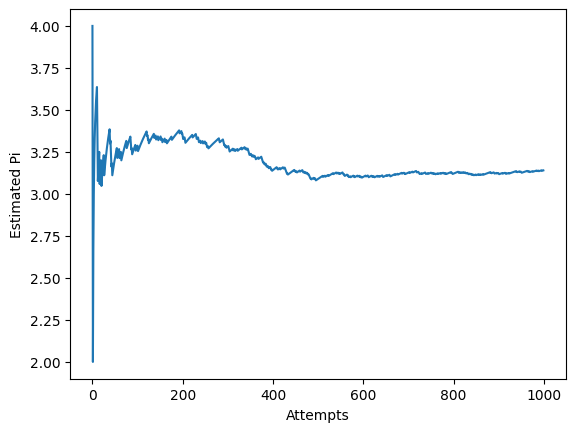

Estimated value of π = 3.14


interactive(children=(IntSlider(value=1000, description='num_samples', max=10000, min=10, step=10), Output()),…

In [6]:
import random
import matplotlib.pyplot as plt

circlePoints = 0
outsidePoints = 0
pi = []

runs = int(input('Number of runs to perform: '))
for i in range(runs):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if (x ** 2 + y ** 2)  <= 1:
        circlePoints += 1
    else:
        outsidePoints += 1
    pi.append((4 * circlePoints) / (circlePoints + outsidePoints))
plt.plot(pi)
plt.ylabel('Estimated Pi')
plt.xlabel('Attempts')
plt.show()
pi = (4 * circlePoints) / (circlePoints + outsidePoints)
print('Estimated value of π =', pi)
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Initialize x and y globally
x = np.random.rand(10000)
y = np.random.rand(10000)

# Function to estimate π using Monte Carlo method
def monte_carlo_pi(num_samples):
    global x, y
    inside_circle = (x[:num_samples]**2 + y[:num_samples]**2) <= 1
    pi_estimate = 4 * np.sum(inside_circle) / num_samples
    return pi_estimate, inside_circle

# Function to update plot
def update_plot(num_samples):
    pi_estimate, inside_circle = monte_carlo_pi(num_samples)
    plt.figure(figsize=(8, 8))
    plt.scatter(x[:num_samples][inside_circle], y[:num_samples][inside_circle], color='blue', alpha=0.5, label='Inside Circle')
    plt.scatter(x[:num_samples][~inside_circle], y[:num_samples][~inside_circle], color='red', alpha=0.5, label='Outside Circle')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f'Monte Carlo Estimation of π (Samples: {num_samples}, π ≈ {pi_estimate:.4f})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Create interactive widget
interact(update_plot, num_samples=IntSlider(min=10, max=10000, step=10, value=1000));


![](https://raw.githubusercontent.com/mrigankdoshy/monte-carlo-simulation-pi/master/Pi/Graphs/Parallel%20-%20Threads%20VS%20Pi.png)

![](https://raw.githubusercontent.com/mrigankdoshy/monte-carlo-simulation-pi/master/Pi/Graphs/Parallel%20-%20Threads%20VS%20Time.png)